In [3]:
## Problem A: Bayesian Dice Game (Posterior Inference)

# You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

# | Die | P(6) | P(1–5) |
# |-----|------|--------|
# | A   | 0.10 | 0.90   |
# | B   | 0.30 | 0.70   |
# | C   | 0.60 | 0.40   |

# Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

# Your job is to infer which die was used using **Bayes’ Theorem**:

# $$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

# where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

# **Tasks:**
# 1. Simulate the experiment by picking a random die and rolling it 10 times.
# 2. Compute posterior probabilities for each die given observed sixes.
# 3. Plot likelihoods and posterior probabilities.
# 4. Evaluate inference accuracy over 100 rounds.

Observed 1 sixes out of 10 rolls
P(A | 1 sixes) = 0.760
P(B | 1 sixes) = 0.237
P(C | 1 sixes) = 0.003
True die: A


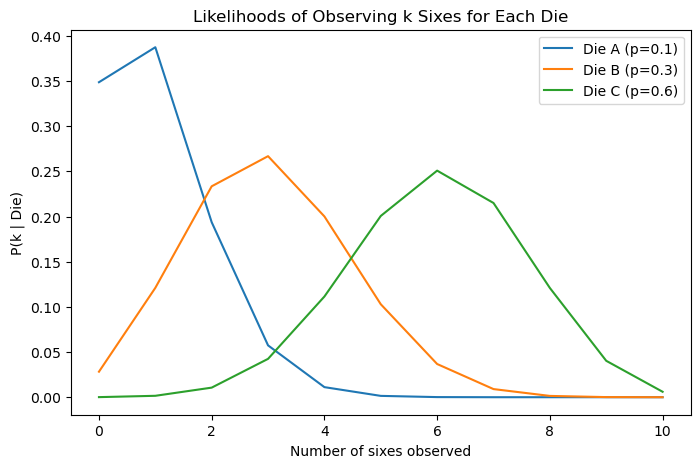

Accuracy over 100 rounds: 0.79


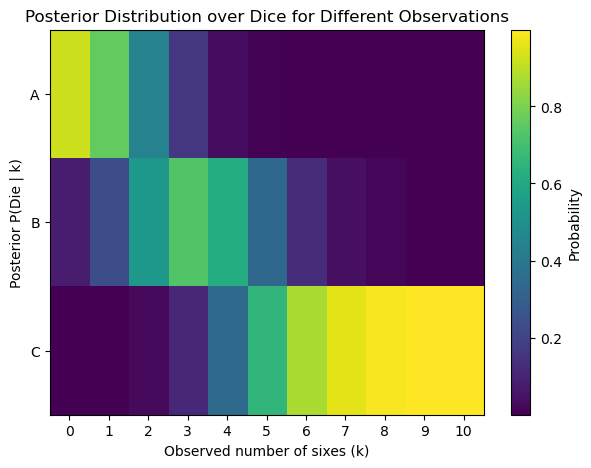

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = np.array([1/3, 1/3, 1/3])
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def simulate_round():
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def simulate_round():
    """
    1) Choose a true die uniformly at random.
    2) Roll it n_rolls times.
    3) Return (true_die_name, number_of_sixes).
    """
    # Choose die index 0,1,2 (A,B,C) with equal probability
    die_idx = np.random.choice(len(dice_names))
    true_die = dice_names[die_idx]
    p_six = dice_probs[true_die]
    
    # Sample number of sixes from Binomial(n_rolls, p_six)
    k = np.random.binomial(n_rolls, p_six)
    
    return true_die, k

def posterior_given_k(k):
    """
    Compute posterior P(Die | k) for dice A,B,C in the order of dice_names.
    Returns a numpy array of length 3.
    """
    # Likelihood for each die: P(k | die_i)
    likelihoods = np.array([
        binomial_prob(n_rolls, k, dice_probs[die])
        for die in dice_names
    ])
    
    # Unnormalized posterior = likelihood * prior
    unnormalized = likelihoods * prior
    
    # Normalize to sum to 1
    posterior = unnormalized / unnormalized.sum()
    
    return posterior

# Example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

# Accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

In [4]:
## Problem B: Linear Regression
# Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [5]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
y_pred = X @ theta
mse_linear = np.mean((y-y_pred)**2)
print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [5. 0.] MSE: 2.8


In [ ]:
## Problem C: Gradient Descent
# Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)